In [24]:
# Dependencies and Setup
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [2]:
#Load stock price files
amd_data = "Resources/cl_stock-amd.csv"
nvda_data = "Resources/cl_stock-nvda.csv"
mu_data = "Resources/cl_stock-mu.csv"

# Load crypto price files - (BTC, XRP, ETH, LTC, EOS, DASH)
btc_data = "Resources/cl_crypto-btc.csv"
xrp_data = "Resources/cl_crypto-xrp.csv"
eth_data = "Resources/cl_crypto-eth.csv"
ltc_data = "Resources/cl_crypto-ltc.csv"
eos_data = "Resources/cl_crypto-eos.csv"
dash_data = "Resources/cl_crypto-dash.csv"

# Create stock price DataFrames
amd_df = pd.read_csv(amd_data).sort_values('date').reset_index(drop=True)
nvda_df = pd.read_csv(nvda_data).sort_values('date').reset_index(drop=True)
mu_df = pd.read_csv(mu_data).sort_values('date').reset_index(drop=True)

# Create crypto price DataFrames
btc_df = pd.read_csv(btc_data).sort_values('date').reset_index(drop=True)
xrp_df = pd.read_csv(xrp_data).sort_values('date').reset_index(drop=True)
eth_df = pd.read_csv(eth_data).sort_values('date').reset_index(drop=True)
ltc_df = pd.read_csv(ltc_data).sort_values('date').reset_index(drop=True)
eos_df = pd.read_csv(eos_data).sort_values('date').reset_index(drop=True)
dash_df = pd.read_csv(dash_data).sort_values('date').reset_index(drop=True)

In [3]:
amd_df.head()

,date,close
0,2015-12-07,2.355
1,2015-12-08,2.390
2,2015-12-09,2.350
3,2015-12-10,2.450
4,2015-12-11,2.360


In [4]:
# btc_df['val_chg'] = btc_df['close'].diff()
# btc_df['pct_chg'] = btc_df['close'].pct_change()
# # btc_df.head()

# amd_df['val_chg'] = amd_df['close'].diff()
# amd_df['pct_chg'] = amd_df['close'].pct_change()
# amd_df.head()

In [17]:
# Merge stock price data into one DataFrame
stocks = [amd_df,nvda_df,mu_df]
merged_stocks = reduce(lambda left,right: pd.merge(left,right,on='date'), stocks)
merged_stocks.rename(columns={'close_x': 'close_amd', 'close_y': 'close_nvda','close': 'close_mu'}, inplace=True)
merged_stocks.sort_values('date',ascending=True,inplace=True)
merged_stocks['date'] =  pd.to_datetime(merged_stocks['date'])
# merged_stocks.dtypes
merged_stocks.head()

,date,close_amd,close_nvda,close_mu
0,2015-12-07,2.355,33.11,14.85
1,2015-12-08,2.390,33.56,14.60
2,2015-12-09,2.350,32.71,14.32
3,2015-12-10,2.450,32.98,14.66
4,2015-12-11,2.360,32.49,14.04


In [15]:
# Merge cryptos into one DataFrame
cryptos1 = [btc_df,xrp_df,eth_df]
merged_crypto1 = reduce(lambda left,right: pd.merge(left,right,on='date'), cryptos1)
merged_crypto1.rename(columns={'close_x': 'close_btc', 'close_y': 'close_xrp','close': 'close_eth'}, inplace=True)

cryptos2 = [ltc_df,eos_df,dash_df]
merged_crypto2 = reduce(lambda left,right: pd.merge(left,right,on='date'), cryptos2)
merged_crypto2.rename(columns={'close_x': 'close_ltc', 'close_y': 'close_eos','close': 'close_dash'}, inplace=True)

all_crypto_df = pd.merge(merged_crypto1, merged_crypto2, on="date", how="outer")
all_crypto_df.dropna(how='any',inplace=True)
all_crypto_df['date'] =  pd.to_datetime(all_crypto_df['date'])
# all_crypto_df.dtypes
all_crypto_df.head()

,date,close_btc,close_xrp,close_eth,close_ltc,close_eos,close_dash
1,2014-12-09,352.19,0.0,0.0,3.53,0.0,2.5
2,2014-12-10,347.94,0.0,0.0,3.50,0.0,2.5
3,2014-12-11,347.68,0.0,0.0,3.48,0.0,2.5
4,2014-12-12,353.40,0.0,0.0,3.49,0.0,2.5
5,2014-12-13,348.24,0.0,0.0,3.48,0.0,2.5


date          datetime64[ns]
close_btc            float64
close_xrp            float64
close_eth            float64
close_ltc            float64
close_eos            float64
close_dash           float64
dtype: object

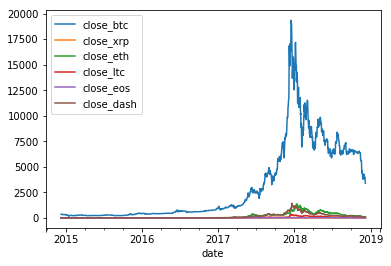

In [13]:
all_crypto_df.plot(x='date', y=['close_btc', 'close_xrp', 'close_eth','close_ltc','close_eos','close_dash'], kind="line")


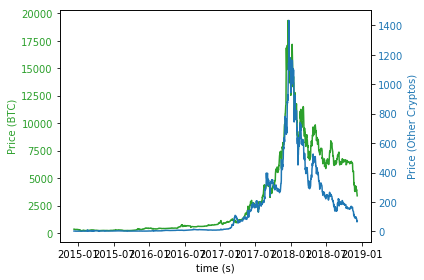

In [19]:
# Create some mock data
# t = np.arange(0.01, 10.0, 0.01)
# data1 = np.exp(t)
# data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Price (BTC)', color=color)
ax1.plot(all_crypto_df['date'], all_crypto_df['close_btc'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price (Other Cryptos)', color=color)  # we already handled the x-label with ax1
ax2.plot(all_crypto_df['date'], all_crypto_df['close_dash'],color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [9]:
all_crypto_df.date

1       2014-12-09
2       2014-12-10
3       2014-12-11
4       2014-12-12
5       2014-12-13
6       2014-12-14
7       2014-12-15
8       2014-12-16
9       2014-12-17
10      2014-12-18
11      2014-12-19
12      2014-12-20
13      2014-12-21
14      2014-12-22
15      2014-12-23
16      2014-12-24
17      2014-12-25
18      2014-12-26
19      2014-12-27
20      2014-12-28
21      2014-12-29
22      2014-12-30
23      2014-12-31
24      2015-01-01
25      2015-01-02
26      2015-01-03
27      2015-01-04
28      2015-01-05
29      2015-01-06
30      2015-01-07
           ...    
1431    2018-11-08
1432    2018-11-09
1433    2018-11-10
1434    2018-11-11
1435    2018-11-12
1436    2018-11-13
1437    2018-11-14
1438    2018-11-15
1439    2018-11-16
1440    2018-11-17
1441    2018-11-18
1442    2018-11-19
1443    2018-11-20
1444    2018-11-21
1445    2018-11-22
1446    2018-11-23
1447    2018-11-24
1448    2018-11-25
1449    2018-11-26
1450    2018-11-27
1451    2018-11-28
1452    2018

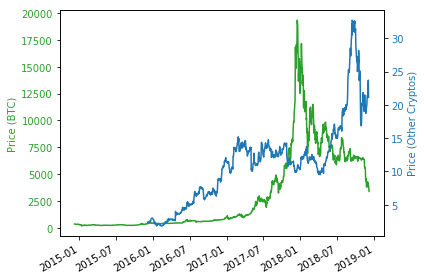

In [30]:
# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()

color = 'tab:green'
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Price (BTC)', color=color)
ax1.plot(all_crypto_df['date'], all_crypto_df['close_btc'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.xaxis.set_major_locator(years)
fig.autofmt_xdate()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price (Other Cryptos)', color=color)  # we already handled the x-label with ax1
ax2.plot(merged_stocks['date'], merged_stocks['close_amd'],color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()